In [16]:
#%pip install scikit-learn
#%pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble  import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
import random

from sklearn import metrics
from collections import Counter
import argparse
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import ParameterGrid
#import lightgbm as lgb

In [28]:
df = pd.read_csv("reports/nd_infer/results.csv")

In [29]:
input_feat = df["snippet"]
output_feat = df["temporal_prediction_nd_rouge"]

In [30]:
train_mask = df["sudden_batch"]<25

In [31]:
train_df = df.loc[train_mask, :]

In [32]:
rmse = []

word_vectorizer   = TfidfVectorizer(
    sublinear_tf  = True,
    strip_accents = 'unicode',
    analyzer      = 'word',
    token_pattern = r'\w{1,}',
    stop_words    = 'english',
    ngram_range   = (1, 1),
    max_features  = 40000)

c = 0
C_parameter = np.arange(0.1, 1, 0.1) 

# use best C

C_parameter = [1]

In [33]:
df.sudden_batch.max()

65

In [34]:
RS = 42

In [35]:
df.loc[(df["sudden_batch"]<batch_id) & (df["sudden_batch"]>2), "temporal_prediction_nd_rouge"]

26      0.000000
30      0.000000
31      0.000000
45      0.000000
46      0.000000
          ...   
2845    0.000000
2854    0.105263
2863    0.285714
2864    0.400000
2870    0.133333
Name: temporal_prediction_nd_rouge, Length: 312, dtype: float64

In [58]:
batch_probs_rouge = []

for batch_id in range(11, df.sudden_batch.max()+1):  
      X_train, X_val      = df.loc[(df["sudden_batch"]<batch_id) & (df["sudden_batch"]!=0), "snippet"], df.loc[df["sudden_batch"]==batch_id, "snippet"]
      y_train, y_val      = df.loc[(df["sudden_batch"]<batch_id) & (df["sudden_batch"]!=0), "temporal_prediction_nd_rouge"], df.loc[df["sudden_batch"]==batch_id, "temporal_prediction_nd_rouge"]
      
      word_vectorizer.fit(X_train)
      
      train_word_features = word_vectorizer.transform(X_train)
      val_word_features   = word_vectorizer.transform(X_val)
      
      
      regressor = RandomForestRegressor()
      regressor.fit(train_word_features, y_train)

      probs = regressor.predict(val_word_features)

      batch_probs_rouge.append(np.mean(probs))
      
      mse = metrics.mean_squared_error(y_val, probs)
      
      print(f'batch {batch_id} mse {round(mse, 3)}')

batch 11 mse 0.014
batch 12 mse 0.032
batch 13 mse 0.02
batch 14 mse 0.024
batch 15 mse 0.021
batch 16 mse 0.02
batch 17 mse 0.016
batch 18 mse 0.018
batch 19 mse 0.021
batch 20 mse 0.027
batch 21 mse 0.024
batch 22 mse 0.028
batch 23 mse 0.017
batch 24 mse 0.019
batch 25 mse 0.028
batch 26 mse 0.017
batch 27 mse 0.018
batch 28 mse 0.024
batch 29 mse 0.014
batch 30 mse 0.026
batch 31 mse 0.025
batch 32 mse 0.019
batch 33 mse 0.016
batch 34 mse 0.025
batch 35 mse 0.022
batch 36 mse 0.012
batch 37 mse 0.017
batch 38 mse 0.028
batch 39 mse 0.021
batch 40 mse 0.017
batch 41 mse 0.022
batch 42 mse 0.024
batch 43 mse 0.022
batch 44 mse 0.018
batch 45 mse 0.019
batch 46 mse 0.024
batch 47 mse 0.024
batch 48 mse 0.017
batch 49 mse 0.026
batch 50 mse 0.017
batch 51 mse 0.025
batch 52 mse 0.02
batch 53 mse 0.013
batch 54 mse 0.025
batch 55 mse 0.024
batch 56 mse 0.016
batch 57 mse 0.024
batch 58 mse 0.025
batch 59 mse 0.019
batch 60 mse 0.034
batch 61 mse 0.013
batch 62 mse 0.022
batch 63 mse 0.

In [59]:
import pickle

In [60]:
with open('reports/nd_infer/ind_av_rouge_nd.pickle', 'rb') as handle:
    ind_av_rouge_nd = pickle.load(handle)

with open('reports/nd_infer/batch_rouge_calculations_nd.pickle', 'rb') as handle:
    batch_rouge_calculations_nd = pickle.load(handle)

In [61]:
len(batch_rouge_calculations_nd)

65

In [62]:
import seaborn as sns

In [63]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [64]:
len(batch_probs_rouge)
full = np.concatenate((np.zeros(10), np.array(batch_probs_rouge)))
print(len(full))

65


<Axes: >

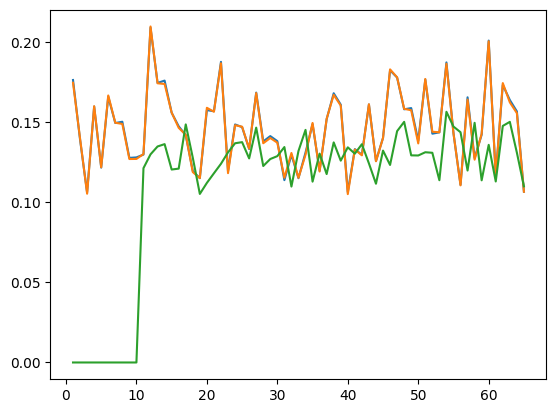

In [65]:
sns.lineplot(x=range(1, 66), y=ind_av_rouge_nd)
sns.lineplot(x=range(1, 66), y=batch_rouge_calculations_nd)
sns.lineplot(x=range(1, 66), y=full)